<a href="https://colab.research.google.com/github/rus4787/Neurocontrol-of-the-quality-of-managers-conversations/blob/main/New_promt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import joblib

In [ ]:
df_label_new = joblib.load('/content/drive/MyDrive/FIPK/base_data/qq85_stthomeoffice_label2.joblib')
df_label_dict_new = joblib.load('/content/drive/MyDrive/FIPK/base_data/qq85_stthomeoffice_label2_dict.joblib')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
df_label_dict_new

,id,label,direct_id,color,ordering,grp
0,1,Описание анализа,None,#C0C0C0,0,NaN
1,2,Положительные эмоции клиента (в %),None,#CD5C5C,1,1.0
2,3,Отрицательные эмоции клиента (в %),None,#F08080,2,1.0
3,4,Нейтральные эмоции клиента (в %),None,#FA8072,3,1.0
4,5,Интенсивность эмоций клиента (количество восклицательных знаков),None,#E9967A,4,1.0
...,...,...,...,...,...,...
79,80,Влияние на продажи,None,#FF1493,79,NaN
80,81,Общая оценка звонка,None,#C71585,80,NaN
81,82,Вероятность успешной продажи,None,#DB7093,81,NaN
82,83,Тип стратегии,None,#FFA07A,82,NaN


In [ ]:
df_label_new.head()

,id,user_id,org_id,log_id,parent_id,label_dict_id,label,gpt,created
0,1,4584,6738632,16967768.0,NaN,1.0,Диалог не состоялся из-за ошибки в номере теле...,1,1726782243
1,2,4584,6738632,16967768.0,1.0,2.0,0,1,1726782243
2,3,4584,6738632,16967768.0,1.0,3.0,0,1,1726782243
3,4,4584,6738632,16967768.0,1.0,4.0,100,1,1726782243
4,5,4584,6738632,16967768.0,1.0,5.0,0,1,1726782243


In [ ]:
features = [
    'Эффективность преодоления возражений (в %)', 'Средняя длина фраз менеджера',
    'Настойчивость менеджера', 'Вопросы от менеджера', 'Длительность разговора (в минутах)',
    'Общее количество вопросов',
    'Общее количество предложений', 'Общее количество слов',
    'Количество уникальных слов'
]

systemrole: 'You are a helpful assistant. Your primary task is to accurately classify and analyze conversations between a manager and a client in Russian. Focus on identifying not only the formal establishment of contact but also any deeper emotional connection or personalized interaction that goes beyond mere formality.'
predtext: 'The manager works for an organization that provides remote training to clients. The manager calls clients and offers them training programs. Roles in the conversation are always divided as follows: 1) Manager, 2) Client. Here is a conversation that took place in Russian:'
posttext: ''' Analyze the conversation between the manager and the client. Respond in JSON format. In the "summary" variable, provide a brief summary of the entire conversation in Russian. For variables label1 to label83, record the count of phrases or relevant information based on the following criteria:
1. Explanation of Analysis:
    * summary:
    * label0: Classify the conversation based:
    - «Холодный звонок без достижения ЛПР»
        - Description: A manager tries to contact a decision-maker (DM) but does not reach it.
        - Objective: Search for decision-makers.
    - «Холодный звонок с первым контактом с ЛПР»
        - Description: The manager contacts the decision-maker for the first time.
        - Purpose: Product presentation, identification of needs.
    - «Холодный звонок с успешной презентацией продукта»
        - Description: The manager presents the product, and the client shows interest.
        - Objective: To move the deal forward.
    - «Тёплый звонок с реактивацией неактивных клиентов»
        - Description: Customers with whom there has been no contact for 2-3 years.
        - Objective: Reactivation, offering new programs.
    - «Тёплый звонок с текущими клиентами для кросс-продаж»
        - Description: Regular customers who buy regularly.
        - Purpose: Sale of additional products, package offers.
    - «Тёплый звонок для продления обучения»
        - Description: Customers whose training is about to expire.
        - Purpose: Extension of training, renewal of certificates.
    - «Звонок для решения проблемных вопросов»
        - Description: A customer submits complaints or questions.
        - Goal: Solving the problem, increasing loyalty.
    - «Звонок с отказом клиента»
        - Description: The customer declines the offer.
        - Objective: Analysis of the reasons for the refusal, possible overcoming of objections.
    - «Звонок с успешным заключением сделки»
        - Description: The customer agrees to the purchase.
        - Goal: Finalization of the transaction, paperwork.
    - «Административный звонок»
        - Description: Calls not directly related to sales (updating contact information, meeting arrangements).
        - Goal: Maintain relationships, prepare for future sales.
2. Emotional Tone (evaluate only the client):
    * label1: Positive emotions (interval: 0-100%)
    * label2: Negative emotions (interval: 0-100%)
    * label3: Neutral emotions (interval: 0-100%)
    * label4: Emotional intensity (number of exclamation marks, interval: 0-10)
3. Number of Questions:
    * label5: Questions from the client (interval: 0-50)
    * label6: Questions from the manager (interval: 0-50)
    * label7: Answers to questions (interval: 0-50)
4. Overcoming Objections:
    * label8: Client objections (interval: 0-10)
    * label9: Manager responses to objections (interval: 0-10)
    * label10: Effectiveness of overcoming objections (percentage, interval: 0-100%). Учесть, предлагал ли менеджер конкретные решения для возражений или просто отложил разговор.
5. Phrase Length:
    * label11: Average phrase length from the client (interval: 0-100 words)
    * label12: Average phrase length from the manager (interval: 0-100 words)
    * label13: Maximum phrase length (interval: 0-200 words)
6. Number of Persuasive Words:
    * label14: Persuasive words from the client (interval: 0-50)
    * label15: Persuasive words from the manager (interval: 0-50)
7. Number of Refusal Formulations:
    * label16: Client refusals (interval: 0-10)
    * label17: Failure Cause Analysis: Break down the reasons for failures into categories (e.g., financial, temporary, organizational) and count the number of failures for each named category. (interval: 0-10 per category)
8. Reasons for Refusals:
    * label18: Reasons for client refusals (interval: 0-10)
    * label19: Analysis of interested products: Divide products into categories (for example, package, individual, subscriptions) and count the number of mentions of each category. (interval: 0-10 per category)
9. Types of Interested Products:
    * label20: Products interested by the client (interval: 0-10)
    * label21: Products interested by the manager (interval: 0-10)
10. Products Refused:
    * label22: Products refused by the client (interval: 0-10)
    * label23: Product Rejection Analysis: Break down products into categories and count the number of abandonments from each category. (interval: 0-10 per category)
11. Conversation Structure:
    * label24: Number of topic transitions (interval: 0-10)
    * label25: Conversation duration (interval: 0-60 minutes)
    * label26: Number of pauses (interval: 0-20)
12. Additional Features:
    * label27: Number of repetitions (interval: 0-10)
    * label28: Number of clarifying questions (interval: 0-10)
    * label29: Number of promises (interval: 0-10)
    * label30: Number of apologies (interval: 0-10)
13. Focus on Package Sales:
    * label31: Mentions of packages (interval: 0-10)
    * label32: Package proposals (interval: 0-10)
    * label33: Package acceptances (interval: 0-10)
    * label34: Reasons for package refusals (interval: 0-10)
14. Short Conversation Evaluation:
    * label35: Short conversation (binary: 1 - short conversation, 0 - not short)
    * label36: Short conversation result (binary: 1 - successful, 0 - unsuccessful)
15. Mathematical Algorithms for Conversation Analysis:
    * label37: Conversation duration: Total duration of the conversation (interval: 0-60 minutes).
    * label38: Number of questions: Total number of questions asked by both the client and the manager (interval: 0-100).
    * label39: Number of sentences: Total number of sentences in the conversation (interval: 0-200).
    * label40: Number of words: Total number of words in the conversation (interval: 0-1000).
    * label41: Number of unique words: The count of unique words in the conversation (interval: 0-500).
    * label42: Number of persuasive words: Number of words or phrases used by the manager for persuasion (interval: 0-50).
    * label43: Number of refusal formulations: Count of refusal statements made (interval: 0-10).
    * label44: Number of package mentions: Count of mentions of package sales (interval: 0-10).
    * label45: Number of package proposals: Number of package proposals made by the manager (interval: 0-10).
    * label46: Number of package acceptances: Number of accepted package proposals by the client (interval: 0-10).
    * label47: Client's Emotional Tone: Determination of the client's emotional tone (positive, negative, neutral) (interval: 0-100%).
    * label48: Topic Transitions: Number of topic transitions in the conversation (interval: 0-10).
    * label49: Emotional Intensity: Assessment of emotional intensity (number of exclamation marks) (interval: 0-10).
    * label50: Engagement Analysis: Evaluation of client and manager engagement (interval: 0-3).
    * label51: Tone Analysis: Identification of tone and emotional context of the conversation (interval: 0-100%).
    * label52: Effectiveness Ranking: Effectiveness of the conversation (e.g., percentage of successful deals) (interval: 0-100%).
    * label53: Manager's Persistence: Degree of the manager's persistence in the conversation (0 - low persistence, 1 - high persistence).
    * label54: Success of Deal Advancement: Analysis of how effectively the manager advanced the deal (0 - unsuccessful, 1 - successful).
    * label55: Client Engagement: Evaluation of client engagement in the conversation (0-3).
    * label56: Manager Expertise: Evaluation of the manager's expertise (0 - not demonstrated, 1 - effectively demonstrated).
    * label57: Personal Contact: Evaluation of the manager's ability to establish personal contact (0 - none, 1 - present).
    * label58: Persistence of Manager: Assessment of manager’s persistence (0 - low or client left, 1 - high persistence).
    * label59: Effectiveness of Offers: Evaluation of the effectiveness of the manager's offers (0 - ineffective, 1 - effective).
    * label60: Overall Quality of Interaction: Overall quality rating of the interaction (0 - poor, 1 - good).
    * label61: Rate of Conversion: Rate of successful conversions in the conversation (0-100%).
    * label62: Personal Discount Offered: Indication of whether a personal discount was offered (0 - not offered, 1 - offered).
    * label63: Final Client Decision: Final decision made by the client (0 - refused, 1 - accepted).
    * label64: Client Left the Conversation (binary: 1 - manager failed to secure the client, 0 - client did not leave).
    * label65: Summary of Manager’s Performance: Short summary of the manager’s performance in the conversation (0-3).
    * label66: Summary of Client’s Response: Short summary of the client's response and engagement (0-3).
    * label67: Recommendations for Improvement: Recommendations for improving the manager's performance (text).
16. Discussion of Training Programs (evaluate which programs were discussed):
    * label68: Programs discussed under Antiterrorism (list the specific programs discussed).
    * label69: Programs discussed under Civil Defense (list the specific programs discussed).
    * label70: Programs discussed under Procurement (list the specific programs discussed).
    * label71: Programs discussed under Occupational Health and Safety (list the specific programs discussed).
    * label72: Programs discussed under Fire Safety (list the specific programs discussed).
    * label73: Programs discussed under Ecology (list the specific programs discussed).
    * label74: Programs discussed under Waste Management (list the specific programs discussed).
    * label75: Programs discussed under Energy Conservation (list if Energy Conservation was discussed).
17. Additional Conversation Attributes:
    * label76: Type of Call:
        - Indicate whether the call was warm or cold.
        - Values:`0`: Warm call; `1`: Cold call
        - Example: If the manager is contacting an existing client, label76 would be `0`.
    * label77: Sales Cycle Stage:
        - Specify the stage of the sales cycle the conversation represents.
        - Possible values (textual):
            - «В поисках лица, принимающего решения»
            - «Первый контакт с лицом, принимающим решения»
            - «Работа с текущими клиентами»
            - «Другое»
        - Example: If the manager is trying to find and establish contact with the decision-maker, label77 would be "В поисках лица, принимающего решения".
    * label78: Call Purpose:
        - Indicate the main purpose of the call.
        - Possible values (textual):
            - «Презентация продукта»
            - «Определение потребностей клиента»
            - «Перекрестные продажи»
            - «Выбор курса и программы»
            - «Переговоры об оплате и сроках»
            - «Реактивация неактивных клиентов»
            - «Решение проблемных вопросов»
            - «Другое»
        - Example: If the call's purpose was to present training programs to the client, label78 would be "Презентация продукта".
    * label79: Influence on Sale:
        - Indicate the call's influence on the sale.
        - Values: `1`: Direct influence on the sale; `0`: Indirect or no influence
        - Example: If the call directly advances the deal, label79 would be `1`.
    * label80: Overall Call Assessment:
        - Provide an overall qualitative assessment of the call.
        - Possible values:
            - "Очень плохо": Manager did not achieve call objectives; the call was short and uninformative; client was not interested or was possibly irritated.
            - "Плохо": Manager attempted to establish contact but failed to engage the client; mistakes were made in product presentation; client remained indifferent or negatively disposed.
            - "Удовлетворительно": Manager conveyed basic product information; client showed some interest but without clear enthusiasm.
            - "Хорошо": Manager effectively presented the product and identified client needs; some objections were overcome; client is interested and open to further communication.
            - "Отлично": Manager performed exceptionally well; established strong contact with the client; client is ready to conclude the deal or agreed to further steps.
        - Example: If the manager effectively presented the product and the client is interested, label80 would be "Хорошо".
    * label81: Probability of Successful Sale:
        - Estimate the probability of successfully concluding the sale based on this conversation.
        - Value: Percentage from `0%` to `100%`.
        - Example:
            - If there is a high likelihood of sale, label81 might be `80%`.
    * label82: Engagement Module:
        - Select one of the following options that best describes the engagement strategy used by the manager to capture the client's attention.
        - Possible values:
            - "Упоминание о проверке"
            - «Изменения в законодательстве»
            - «Обучение по требованиям»
            - "Рекомендации от других компаний"
            - "Изменения в клиентском поле"
            - «Новостная повестка»
            - «Другое»
        - Example: If the manager referred to new legislative requirements, label82 would be "Изменения в законодательстве".
    * label83: Engagement Module Details:
        - Provide a brief generalized phrase or quote used by the manager to engage the client, corresponding to the selected engagement module.
        - Example: If label82 is "Изменения в законодательстве", label83 might be: "С марта этого года введены новые требования по обучению персонала. Все ли ваши сотрудники прошли необходимое обучение?"
Please analyze the conversation carefully and fill in all labels according to the provided instructions.
'''
conversation = '''

'''
response = gpt4(systemrole, predtext + conversation + posttext)
print(response)

**ЧИСТЫЙ ПРОМТ**

systemrole: 'You are a helpful assistant. Your primary task is to accurately classify and analyze conversations between a manager and a client in Russian. Focus on identifying not only the formal establishment of contact but also any deeper emotional connection or personalized interaction that goes beyond mere formality.'
predtext: 'The manager works for an organization that provides remote training to clients. The manager calls clients and offers them training programs. Roles in the conversation are always divided as follows: 1) Manager, 2) Client. Here is a conversation that took place in Russian:'
posttext: ''' Analyze the conversation between the manager and the client. Respond in JSON format. In the "summary" variable, provide a brief summary of the entire conversation in Russian. For variables label1 to label83, record the count of phrases or relevant information based on the following criteria:
1. Explanation of Analysis:
    * summary:
    * label0: Classify the conversation based:
    - «Холодный звонок без достижения ЛПР»
        - Description: A manager tries to contact a decision-maker (DM) but does not reach it.
        - Objective: Search for decision-makers.
    - «Холодный звонок с первым контактом с ЛПР»
        - Description: The manager contacts the decision-maker for the first time.
        - Purpose: Product presentation, identification of needs.
    - «Холодный звонок с успешной презентацией продукта»
        - Description: The manager presents the product, and the client shows interest.
        - Objective: To move the deal forward.
    - «Тёплый звонок с реактивацией неактивных клиентов»
        - Description: Customers with whom there has been no contact for 2-3 years.
        - Objective: Reactivation, offering new programs.
    - «Тёплый звонок с текущими клиентами для кросс-продаж»
        - Description: Regular customers who buy regularly.
        - Purpose: Sale of additional products, package offers.
    - «Тёплый звонок для продления обучения»
        - Description: Customers whose training is about to expire.
        - Purpose: Extension of training, renewal of certificates.
    - «Звонок для решения проблемных вопросов»
        - Description: A customer submits complaints or questions.
        - Goal: Solving the problem, increasing loyalty.
    - «Звонок с отказом клиента»
        - Description: The customer declines the offer.
        - Objective: Analysis of the reasons for the refusal, possible overcoming of objections.
    - «Звонок с успешным заключением сделки»
        - Description: The customer agrees to the purchase.
        - Goal: Finalization of the transaction, paperwork.
    - «Административный звонок»
        - Description: Calls not directly related to sales (updating contact information, meeting arrangements).
        - Goal: Maintain relationships, prepare for future sales.
2. Emotional Tone (evaluate only the client):
    * label1: Positive emotions (interval: 0-100%)
3. Number of Questions:
    * label6: Questions from the manager (interval: 0-50)
4. Overcoming Objections:
    * label8: Client objections (text)
    - Description: Each phrase capturing the client's objections to purchasing or engaging further with the company. This includes expressions of doubt, unwillingness to collaborate, or lack of interest in continuing the conversation. For label8, write only the exact words or phrases spoken by the client. No generalization, rephrasing, or creation of new interpretations is allowed. Each phrase ends with an interpretation of the objection’s nature in parentheses, either as an “объективная причина” or “эмоциональное возражение.”
    - Example: If the client says, "Мы не будем обучаться, потому что уже проходили," write exactly that phrase in label8.”
    * label9: Manager responses to objections (text)
        - Description: Manager’s responses that attempt to overcome each specific client objection from label8. For label9, write only the exact words or phrases spoken by the manager. All rephrasing or interpretation should be excluded. Only the spoken text should be included, without modifications. Following each manager’s phrase, specify the response type in parentheses, such as “solution offered” or “benefit explanation.”
        - Example: If the manager says, "Если сроки истекли, мы можем обновить обучение" then label9 should include that exact phrase.
    * label10: Effectiveness of overcoming objections (percentage, interval: 0-100%).
    - Description: Take into account whether the manager offered specific solutions for objections or simply postponed the conversation.
5. Phrase Length:
    * label12: Average phrase length from the manager (interval: 0-100 words)
7. Number of Refusal Formulations:
    * label16: Client refusals: Clear client statements indicating final refusal to purchase, collaborate, or continue the conversation. Distinct from label8, label16 only includes refusals where objections were not overcome and led to the client’s final decision to decline or end further engagement. Example: “We're choosing another provider,” or “We don’t need this service now.” (text)
8. Reasons for Refusals:
    * label18: Reasons for client refusals: Short individualized formulation of each refusal listed in label16. This includes a brief, context-specific description of each client’s reason for refusal (e.g., “budget constraints,” “already working with another provider,” “no current need for the service”).(text)
11. Conversation Structure:
    * label25: Conversation duration (interval: 0-60 minutes)
12. Additional Features:
    * label28: Number of clarifying questions (interval: 0-10)
13. Focus on Package Sales:
    * label32: Package proposals (interval: 0-10)
14. Short Conversation Evaluation:
    * label35: Short conversation (binary: 1 - short conversation, 0 - not short)
    * label36: Short conversation result (binary: 1 - successful, 0 - unsuccessful)
15. Mathematical Algorithms for Conversation Analysis:
    * label37: Conversation duration: Total duration of the conversation (interval: 0-60 minutes).
    * label38: Number of questions: Total number of questions asked by both the client and the manager (interval: 0-100).
    * label39: Number of sentences: Total number of sentences in the conversation (interval: 0-200).
    * label40: Number of words: Total number of words in the conversation (interval: 0-1000).
    * label41: Number of unique words: The count of unique words in the conversation (interval: 0-500).
    * label42: Number of persuasive words: Number of words or phrases used by the manager for persuasion (interval: 0-50).
    * label52: Effectiveness Ranking: Effectiveness of the conversation (e.g., percentage of successful deals) (interval: 0-100%).
    * label53: Manager's Persistence: Degree of the manager's persistence in the conversation (0 - low persistence, 1 - high persistence).
    * label55: Client Engagement: Evaluation of client engagement in the conversation (0-3).
    * label56: Manager Expertise: Evaluation of the manager's expertise (0 - not demonstrated, 1 - effectively demonstrated).
    * label57: Personal Contact: Evaluation of the manager's ability to establish personal contact (0 - none, 1 - present).
    * label61: Rate of Conversion: Rate of successful conversions in the conversation (0-100%).
    * label63: Final Client Decision: Final decision made by the client (0 - refused, 1 - accepted).
    * label64: Client Left the Conversation (binary: 1 - manager failed to secure the client, 0 - client did not leave).
    * label67: Recommendations for Improvement: Recommendations for improving the manager's performance (text).
16. Discussion of Training Programs (evaluate which programs were discussed):
    * label68: Programs discussed under Antiterrorism (list the specific programs discussed).
    * label69: Programs discussed under Civil Defense (list the specific programs discussed).
    * label70: Programs discussed under Procurement (list the specific programs discussed).
    * label71: Programs discussed under Occupational Health and Safety (list the specific programs discussed).
    * label72: Programs discussed under Fire Safety (list the specific programs discussed).
    * label73: Programs discussed under Ecology (list the specific programs discussed).
    * label74: Programs discussed under Waste Management (list the specific programs discussed).
    * label75: Programs discussed under Energy Conservation (list if Energy Conservation was discussed).
17. Additional Conversation Attributes:
    * label76: Type of Call:
        - Indicate whether the call was warm or cold.
        - Values:`0`: Warm call; `1`: Cold call
        - Example: If the manager is contacting an existing client, label76 would be `0`.
    * label77: Sales Cycle Stage:
        - Specify the stage of the sales cycle the conversation represents.
        - Possible values (textual):
            - «В поисках лица, принимающего решения»
            - «Первый контакт с лицом, принимающим решения»
            - «Работа с текущими клиентами»
            - «Другое»
        - Example: If the manager is trying to find and establish contact with the decision-maker, label77 would be "В поисках лица, принимающего решения".
    * label78: Call Purpose:
        - Indicate the main purpose of the call.
        - Possible values (textual):
            - «Презентация продукта»
            - «Определение потребностей клиента»
            - «Перекрестные продажи»
            - «Выбор курса и программы»
            - «Переговоры об оплате и сроках»
            - «Реактивация неактивных клиентов»
            - «Решение проблемных вопросов»
            - «Другое»
        - Example: If the call's purpose was to present training programs to the client, label78 would be "Презентация продукта".
    * label79: Influence on Sale:
        - Indicate the call's influence on the sale.
        - Values: `1`: Direct influence on the sale; `0`: Indirect or no influence
        - Example: If the call directly advances the deal, label79 would be `1`.
    * label80: Overall Call Assessment:
        - Provide an overall qualitative assessment of the call.
        - Possible values:
            - "Очень плохо": Manager did not achieve call objectives; the call was short and uninformative; client was not interested or was possibly irritated.
            - "Плохо": Manager attempted to establish contact but failed to engage the client; mistakes were made in product presentation; client remained indifferent or negatively disposed.
            - "Удовлетворительно": Manager conveyed basic product information; client showed some interest but without clear enthusiasm.
            - "Хорошо": Manager effectively presented the product and identified client needs; some objections were overcome; client is interested and open to further communication.
            - "Отлично": Manager performed exceptionally well; established strong contact with the client; client is ready to conclude the deal or agreed to further steps.
        - Example: If the manager effectively presented the product and the client is interested, label80 would be "Хорошо".
    * label81: Probability of Successful Sale:
        - Estimate the probability of successfully concluding the sale based on this conversation.
        - Value: Percentage from `0%` to `100%`.
        - Example:
            - If there is a high likelihood of sale, label81 might be `80%`.
    * label82: Engagement Module:
        - Select one of the following options that best describes the engagement strategy used by the manager to capture the client's attention.
        - Possible values:
            - "Упоминание о проверке"
            - «Изменения в законодательстве»
            - «Обучение по требованиям»
            - "Рекомендации от других компаний"
            - "Изменения в клиентском поле"
            - «Новостная повестка»
            - «Другое»
        - Example: If the manager referred to new legislative requirements, label82 would be "Изменения в законодательстве".
    * label83: Engagement Module Details:
        - label83 should include the first 0-5 lines from the manager (M) at the start of the conversation.
        - Only the exact words or phrases spoken by the manager should be included in label83.
        - No generalization, interpretation, or rephrasing is allowed.
        - Provide a brief, generalized phrase or sequence of phrases used by the manager to engage the client and shift the conversation towards the core objective, such as training, compliance, or regulation updates. In this phrase, the manager greets the client, introduces their organization or topic, and connects with the client’s relevant needs (like certification, training, or legal compliance).
        - Key features for identifying this phrase include initial greetings, mention of the manager’s or client’s organization, and words like «инспекция», «сертификат», «обучение», "я звоню по какому вопросу" or “требования” which smoothly lead into the main topic.
        - Examples:
            - If the manager says, "Здравствуйте Анастасия Александровна, доброе утро, Анастасия Александровна, Юлия из Федерального института MainPro. Вы, наверное, помните, мы проводили тренинг для Николая Витальевича. Мы также можем сделать это за вас, когда вы были старшим специалистом по администрированию," then only these exact words should be included in label83.
        - Engagement examples:
            - If label82 is "Изменения в законодательстве" label83 could be: “С марта этого года введены новые требования по обучению персонала. Все ли ваши сотрудники прошли необходимое обучение?”
            - If label82 is "Проверки," label83 could be: “Мы заметили, что у вас в этом месяце запланирована проверка. Вы в курсе об этом?”
            - “Мы работали с похожими организациями в вашем регионе по обучению по охране труда и экологии. Как у вас обстоят дела с этим направлением?” or “Ваши коллеги рекомендовали нас, и мы бы хотели обсудить ваши текущие потребности в обучении.”
Please analyze the conversation carefully and fill in all labels according to the provided instructions.
'''
conversation = '''

'''
response = gpt4(systemrole, predtext + conversation + posttext)
print(response)

## Оценка лейблов (матрица)

In [ ]:
data_gpt = pd.read_excel('/content/drive/MyDrive/barnaul_analitic/focus/data_gpt.xlsx')

In [ ]:
!pip install -q phik


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.7 MB/s eta 0:00:00


<ipython-input-15-bd7b5da45f4d>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_gpt[col].fillna(data_gpt[col].mean(), inplace=True)
<ipython-input-15-bd7b5da45f4d>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

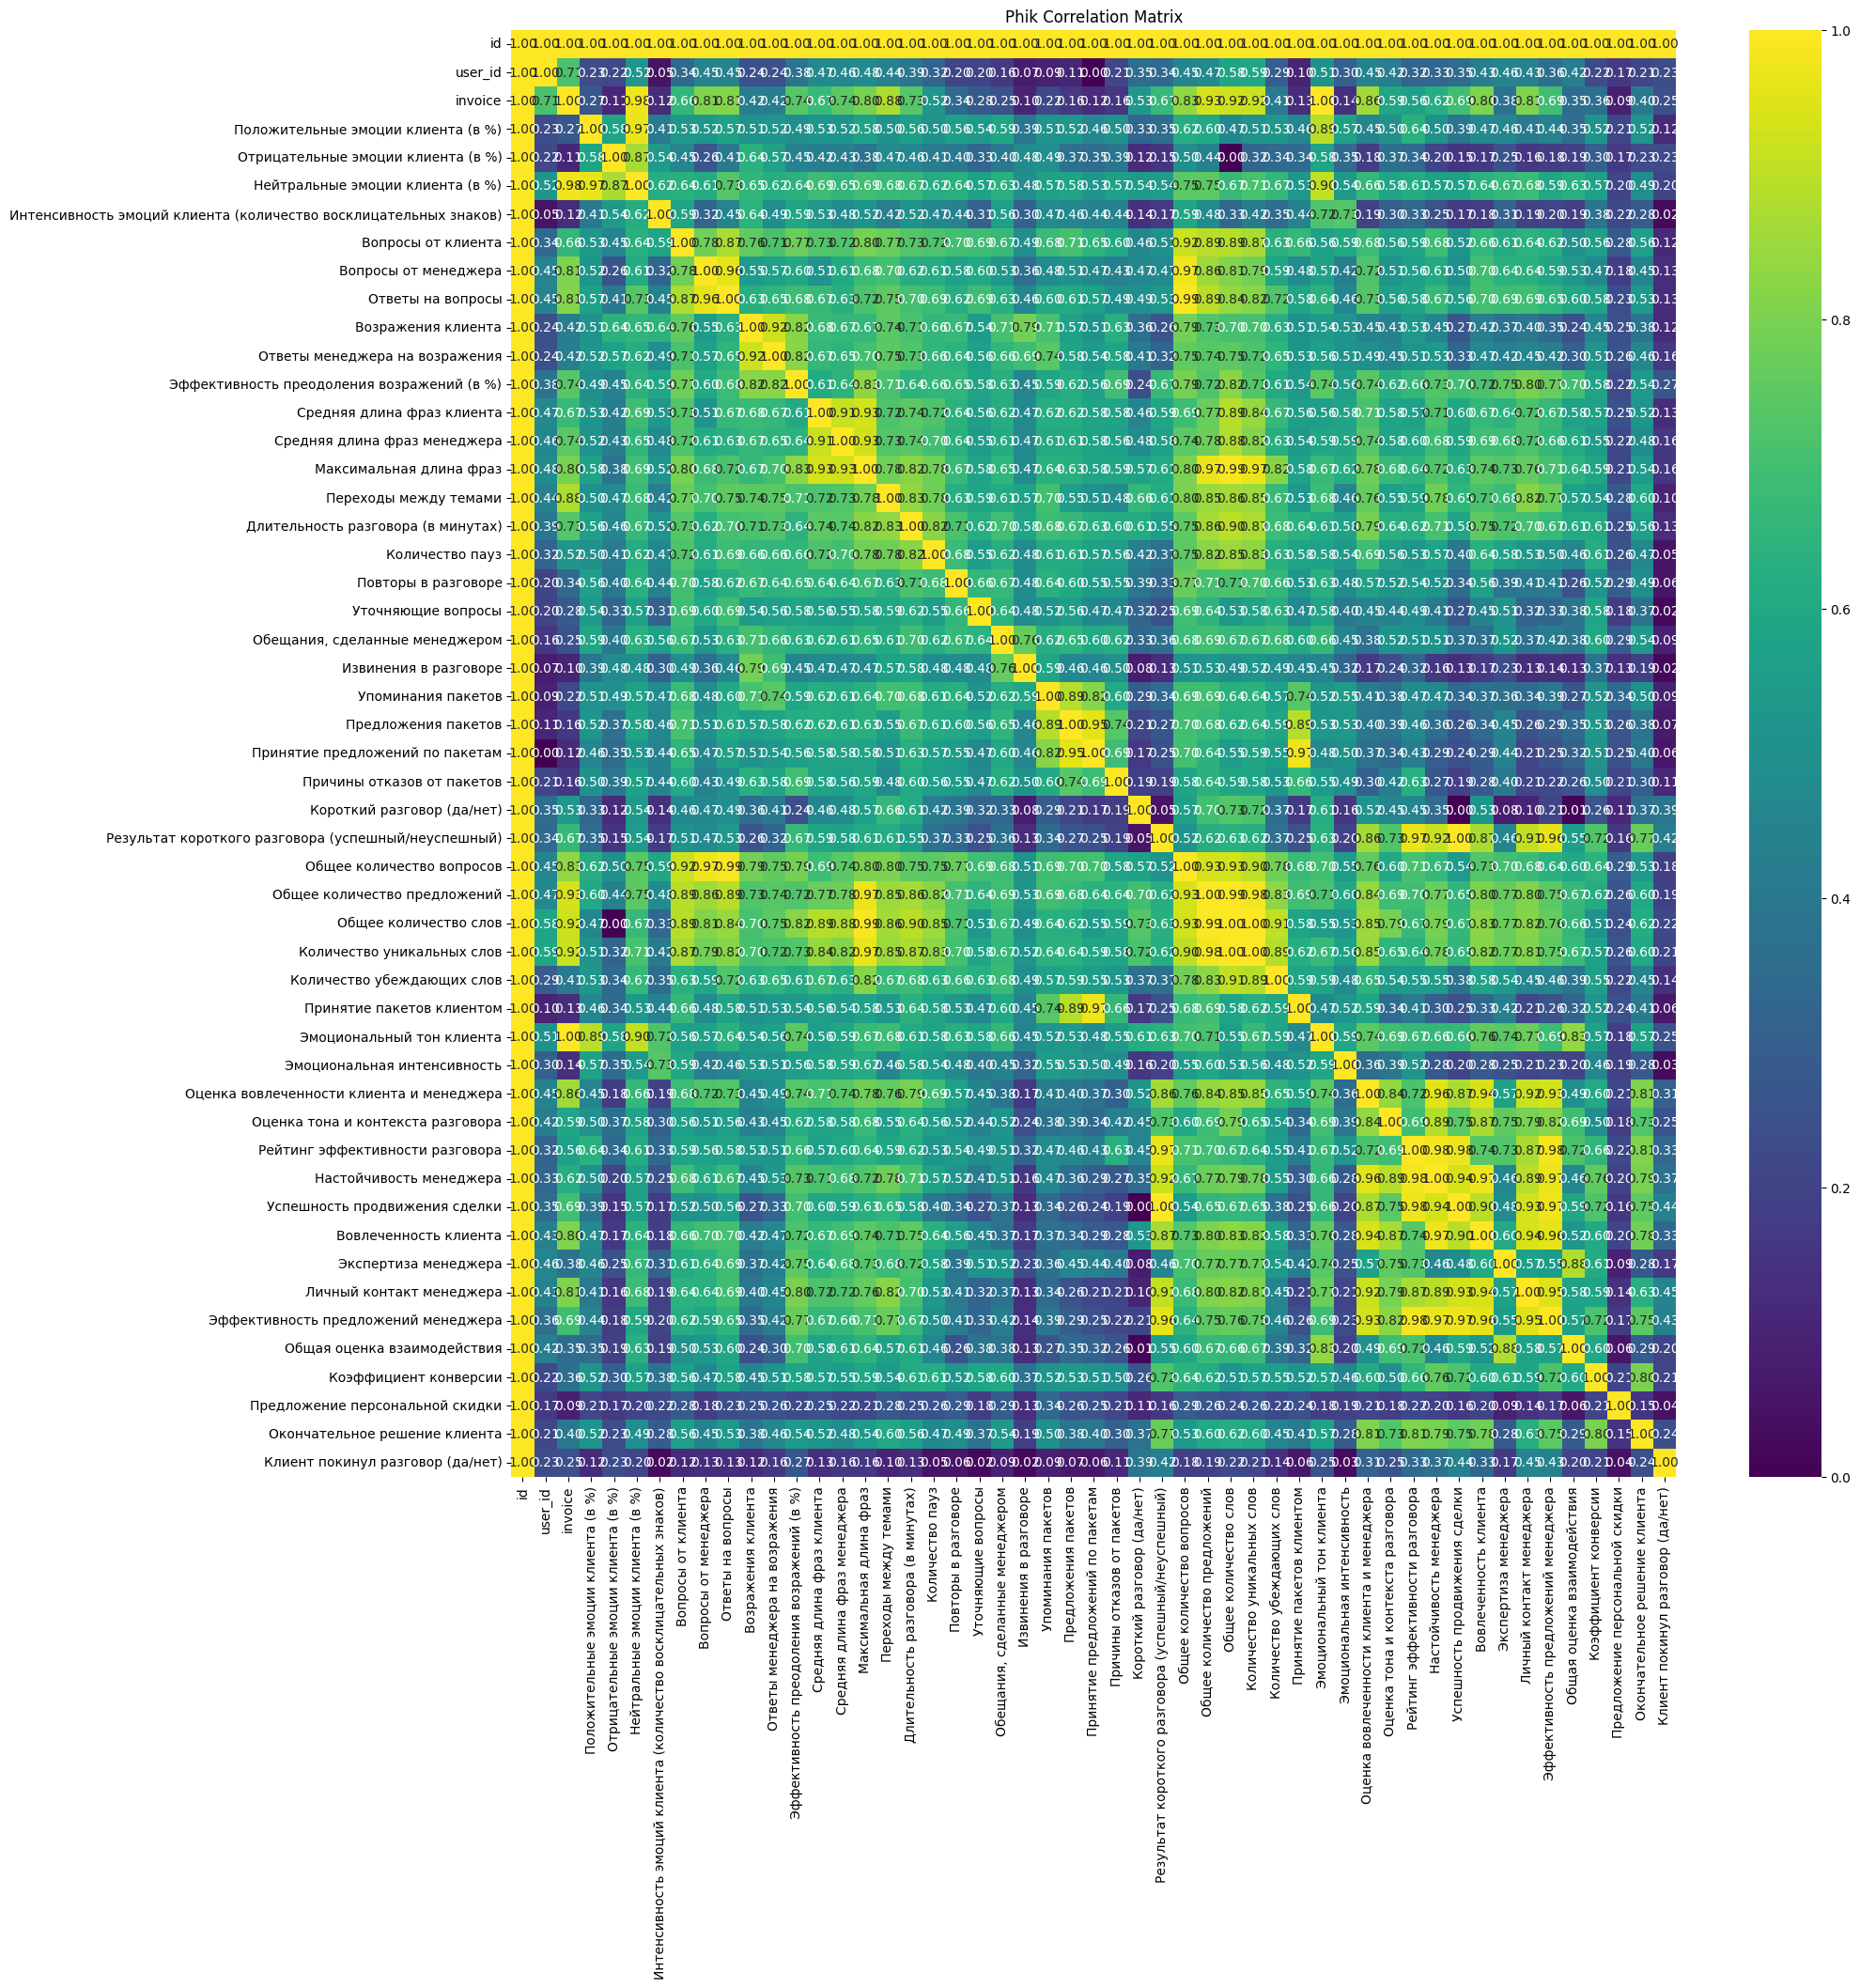

In [ ]:
# prompt: построй phik матрицу и hotmap по ней по data_gpt. таргет: "Успешность продвижения сделки"

import pandas as pd
import numpy as np
from phik import phik_matrix
import matplotlib.pyplot as plt
import seaborn as sns

for col in data_gpt.columns:
    if pd.api.types.is_numeric_dtype(data_gpt[col]):
        data_gpt[col].fillna(data_gpt[col].mean(), inplace=True)
    else:
        data_gpt[col].fillna(data_gpt[col].mode()[0], inplace=True)

# Calculate the phik matrix
phik_matrix_result = data_gpt.phik_matrix(interval_cols=['label' + str(i) for i in range(37, 84) if 'label' + str(i) in data_gpt.columns])

# Create the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(phik_matrix_result, annot=True, cmap='viridis', fmt=".2f")
plt.title('Phik Correlation Matrix')
plt.show()


# Example: Print the phik matrix values for the target variable
target_variable = "Успешность продвижения сделки" # Replace with the actual column name of your target variable

if target_variable in data_gpt.columns:
    print(f"\nPhik correlation with '{target_variable}':")
    print(phik_matrix_result[target_variable].sort_values(ascending=False))
else:
    print(f"Error: '{target_variable}' not found in the DataFrame columns.")

In [ ]:
phik_matrix_result

,id,user_id,invoice,Положительные эмоции клиента (в %),Отрицательные эмоции клиента (в %),Нейтральные эмоции клиента (в %),Интенсивность эмоций клиента (количество восклицательных знаков),Вопросы от клиента,Вопросы от менеджера,Ответы на вопросы,Возражения клиента,Ответы менеджера на возражения,Эффективность преодоления возражений (в %),Средняя длина фраз клиента,Средняя длина фраз менеджера,Максимальная длина фраз,Переходы между темами,Длительность разговора (в минутах),Количество пауз,Повторы в разговоре,Уточняющие вопросы,"Обещания, сделанные менеджером",Извинения в разговоре,Упоминания пакетов,Предложения пакетов,Принятие предложений по пакетам,Причины отказов от пакетов,Короткий разговор (да/нет),Результат короткого разговора (успешный/неуспешный),Общее количество вопросов,Общее количество предложений,Общее количество слов,Количество уникальных слов,Количество убеждающих слов,Принятие пакетов клиентом,Эмоциональный тон клиента,Эмоциональная интенсивность,Оценка вовлеченности клиента и менеджера,Оценка тона и контекста разговора,Рейтинг эффективности разговора,Настойчивость менеджера,Успешность продвижения сделки,Вовлеченность клиента,Экспертиза менеджера,Личный контакт менеджера,Эффективность предложений менеджера,Общая оценка взаимодействия,Коэффициент конверсии,Предложение персональной скидки,Окончательное решение клиента,Клиент покинул разговор (да/нет)
id,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
user_id,1.0,1.000000,0.713415,0.227950,0.218412,0.521042,0.047485,0.337399,0.451416,0.446883,0.244951,0.242883,0.379391,0.470660,0.459114,0.478351,0.439032,0.390794,0.322322,0.202629,0.202953,0.160522,0.074506,0.092389,0.108146,0.000000,0.209266,0.354431,0.340613,0.454944,0.469337,0.584460,0.591572,0.289803,0.099457,0.506086,0.304573,0.449170,0.420387,0.318777,0.325710,0.347790,0.429003,0.455795,0.434641,0.360298,0.419921,0.222689,0.171745,0.213390,0.229633
invoice,1.0,0.713415,1.000000,0.272702,0.108035,0.975867,0.122040,0.658750,0.806661,0.814395,0.419678,0.421492,0.736551,0.674629,0.744514,0.796451,0.878162,0.731738,0.521325,0.342369,0.278173,0.250394,0.098354,0.218013,0.160257,0.124478,0.156911,0.529011,0.670936,0.833369,0.933816,0.922834,0.920523,0.408811,0.126460,1.000000,0.139284,0.858499,0.586129,0.564112,0.621324,0.691971,0.804911,0.375456,0.807661,0.692998,0.354207,0.357381,0.088220,0.401338,0.245161
Положительные эмоции клиента (в %),1.0,0.227950,0.272702,1.000000,0.582160,0.965510,0.409279,0.531473,0.524069,0.573958,0.509539,0.521517,0.493252,0.526201,0.518264,0.576485,0.504107,0.559855,0.501480,0.556547,0.541061,0.589266,0.390703,0.513132,0.524466,0.460399,0.504444,0.330698,0.348762,0.621543,0.598088,0.466105,0.513371,0.528613,0.457429,0.891413,0.567138,0.449505,0.500004,0.636648,0.500219,0.387889,0.470164,0.462822,0.407007,0.443233,0.347773,0.518126,0.210444,0.515927,0.120860
Отрицательные эмоции клиента (в %),1.0,0.218412,0.108035,0.582160,1.000000,0.867844,0.538717,0.451997,0.259922,0.407249,0.638359,0.571452,0.445228,0.421949,0.428960,0.380109,0.473310,0.458382,0.413805,0.399040,0.326415,0.399289,0.478602,0.493146,0.367270,0.348436,0.387403,0.124904,0.152530,0.496562,0.436446,0.000000,0.324109,0.340779,0.343696,0.580477,0.345334,0.177409,0.365626,0.340987,0.203038,0.154008,0.168300,0.247449,0.156636,0.178506,0.193500,0.297463,0.168574,0.230386,0.228614
Нейтральные эмоции клиента (в %),1.0,0.521042,0.975867,0.965510,0.867844,1.000000,0.621864,0.635546,0.609736,0.733240,0.653762,0.622951,0.637724,0.688729,0.654250,0.694028,0.677827,0.670965,0.615542,0.635473,0.567628,0.634546,0.484804,0.570237,0.583542,0.52